# Clustering Using Customer Transactions Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
retail_df = pd.read_csv("https://raw.githubusercontent.com/surajdwivedi0307/UnsupervisedLearning/main/retail_txns.csv")

In [3]:
retail_df.Country.value_counts()

,count
Country,
France,8326


In [4]:
retail_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8326 entries, 0 to 8325
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        8326 non-null   int64  
 1   InvoiceNo    8326 non-null   int64  
 2   StockCode    8326 non-null   object 
 3   Description  8326 non-null   object 
 4   Quantity     8326 non-null   int64  
 5   InvoiceDate  8326 non-null   object 
 6   UnitPrice    8326 non-null   float64
 7   CustomerID   8326 non-null   float64
 8   Country      8326 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 585.5+ KB


In [5]:
retail_df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [6]:
retail_df.dropna( subset = ['CustomerID'], inplace = True)

In [7]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8326 entries, 0 to 8325
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        8326 non-null   int64  
 1   InvoiceNo    8326 non-null   int64  
 2   StockCode    8326 non-null   object 
 3   Description  8326 non-null   object 
 4   Quantity     8326 non-null   int64  
 5   InvoiceDate  8326 non-null   object 
 6   UnitPrice    8326 non-null   float64
 7   CustomerID   8326 non-null   float64
 8   Country      8326 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 585.5+ KB


In [8]:
retail_df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [9]:
retail_df.duplicated().sum()

0

In [10]:
retail_df.drop_duplicates(inplace = True)

In [11]:
retail_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8326 entries, 0 to 8325
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        8326 non-null   int64  
 1   InvoiceNo    8326 non-null   int64  
 2   StockCode    8326 non-null   object 
 3   Description  8326 non-null   object 
 4   Quantity     8326 non-null   int64  
 5   InvoiceDate  8326 non-null   object 
 6   UnitPrice    8326 non-null   float64
 7   CustomerID   8326 non-null   float64
 8   Country      8326 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 585.5+ KB


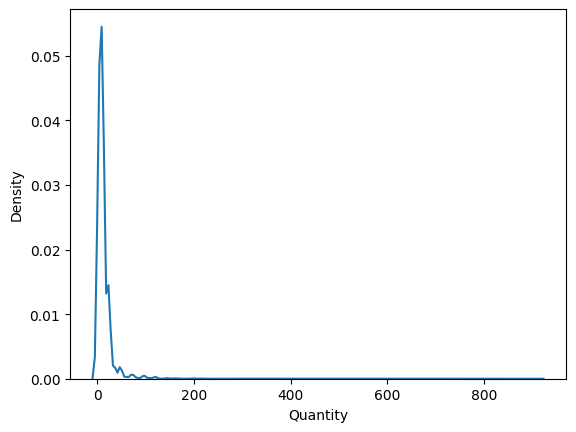

In [12]:
sn.kdeplot(retail_df.Quantity);

In [13]:
retail_df[retail_df.Quantity < 0][0:10]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


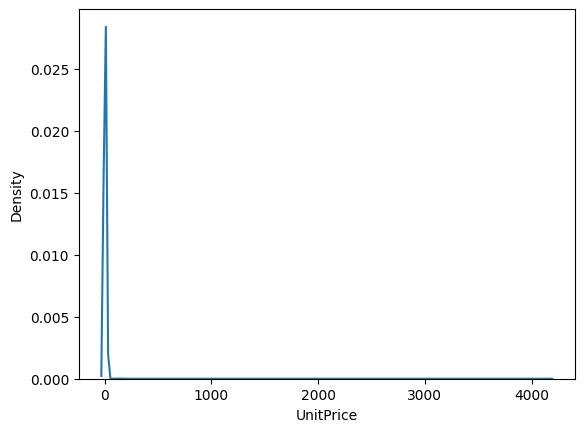

In [14]:
sn.kdeplot(retail_df.UnitPrice);

### StockCode Information

In [15]:
stock_df = retail_df[['CustomerID', 'StockCode']]

In [16]:
stock_df.drop_duplicates(inplace = True)

In [17]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 8325
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  5637 non-null   float64
 1   StockCode   5637 non-null   object 
dtypes: float64(1), object(1)
memory usage: 132.1+ KB


In [18]:
len(stock_df.StockCode.unique())

1522

In [19]:
len(stock_df.CustomerID.unique())

87

In [20]:
stock_count_df = stock_df.StockCode.value_counts().reset_index()
stock_count_df.columns = ['StockCode', 'count']

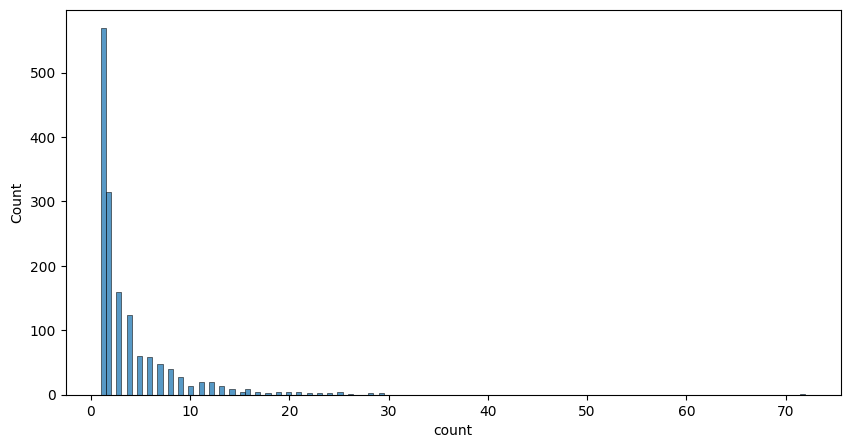

In [21]:
plt.figure(figsize = (10, 5))
sn.histplot( stock_count_df['count']);

In [22]:
stock_count_df = stock_count_df[stock_count_df['count'] > 10]
stock_count_df

,StockCode,count
0,POST,72
1,22554,29
2,23084,29
3,21212,28
4,22551,28
...,...,...
105,21914,11
106,22331,11
107,21883,11
108,22037,11


### Customer Information

In [23]:
cust_count_df = stock_df.CustomerID.value_counts().reset_index()
cust_count_df.columns = ['CustomerID', 'count']

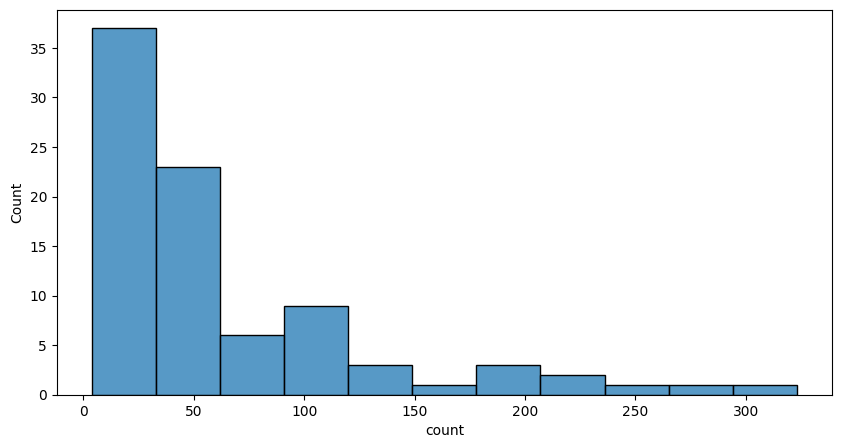

In [24]:
plt.figure(figsize = (10, 5))
sn.histplot( cust_count_df['count']);

In [25]:
cust_count_df[cust_count_df['count'] > 10]
cust_count_df

,CustomerID,count
0,12567.0,323
1,12681.0,267
2,12536.0,260
3,12714.0,216
4,12682.0,209
...,...,...
82,12509.0,7
83,12686.0,7
84,12659.0,5
85,12736.0,4


In [26]:
clean_stock_df = stock_df[stock_df.StockCode.isin(stock_count_df.StockCode.unique()) &
                          stock_df.CustomerID.isin(cust_count_df.CustomerID.unique())]

In [27]:
clean_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787 entries, 0 to 8325
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1787 non-null   float64
 1   StockCode   1787 non-null   object 
dtypes: float64(1), object(1)
memory usage: 41.9+ KB


In [28]:
clean_stock_df['bought'] = 1.0

In [29]:
clean_stock_df

,CustomerID,StockCode,bought
0,12583.0,22728,1.0
1,12583.0,22727,1.0
2,12583.0,22726,1.0
4,12583.0,21883,1.0
8,12583.0,22326,1.0
...,...,...,...
8292,12615.0,20682,1.0
8304,12615.0,22620,1.0
8311,12680.0,22631,1.0
8324,12680.0,23255,1.0


In [30]:
cust_stocks_df = clean_stock_df.pivot( index='StockCode',
                                       columns='CustomerID',
                                       values = "bought" )
cust_stocks_df[0:10]

CustomerID,12413.0,12437.0,12441.0,12488.0,12489.0,12490.0,12491.0,12493.0,12494.0,12506.0,...,12726.0,12727.0,12728.0,12729.0,12731.0,12732.0,12735.0,12736.0,12740.0,14277.0
StockCode,,,,,,,,,,,,,,,,,,,,,
20676,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
20682,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
20712,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20719,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
20724,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20725,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0
20726,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20749,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20750,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN


In [31]:
cust_stocks_df.shape

(110, 85)

In [32]:
cust_stocks_df = cust_stocks_df.fillna(0.0)
cust_stocks_df.sample(10)

CustomerID,12413.0,12437.0,12441.0,12488.0,12489.0,12490.0,12491.0,12493.0,12494.0,12506.0,...,12726.0,12727.0,12728.0,12729.0,12731.0,12732.0,12735.0,12736.0,12740.0,14277.0
StockCode,,,,,,,,,,,,,,,,,,,,,
22630,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22326,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23238,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23108,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
21121,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
POST,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [33]:
from sklearn.metrics.pairwise import pairwise_distances

In [34]:
jaccard_distance = pairwise_distances(cust_stocks_df.values, metric="jaccard")

In [35]:
jaccard_distance

array([[0.        , 0.7826087 , 0.85714286, ..., 0.75      , 0.83333333,
        0.8630137 ],
       [0.7826087 , 0.        , 0.57142857, ..., 0.76      , 0.52173913,
        0.78082192],
       [0.85714286, 0.57142857, 0.        , ..., 0.77272727, 0.5       ,
        0.81944444],
       ...,
       [0.75      , 0.76      , 0.77272727, ..., 0.        , 0.76      ,
        0.80555556],
       [0.83333333, 0.52173913, 0.5       , ..., 0.76      , 0.        ,
        0.7972973 ],
       [0.8630137 , 0.78082192, 0.81944444, ..., 0.80555556, 0.7972973 ,
        0.        ]])

In [36]:
jaccard_distance.shape

(110, 110)

In [37]:
from sklearn.cluster import HDBSCAN

In [38]:
h_cluster = HDBSCAN(min_cluster_size=2, metric = 'jaccard')

In [39]:
#h_cluster = AgglomerativeClustering(n_clusters = 5)

In [40]:
h_cluster.fit(cust_stocks_df)

HDBSCAN(metric='jaccard', min_cluster_size=2)

In [41]:
h_cluster.labels_

array([ 2, 18, 18,  8,  8, 18, 18, -1, -1, -1, 23, 23, 23, 21, 21,  4, -1,
       -1,  2, -1, 19, 19, -1, -1,  9, -1, -1, 22, 22, 22, 16, 16, -1, -1,
        0, -1, 20, 20, 14, 14, 17, 17, 19, -1, -1,  4, 18, 11, 11, 18, -1,
        7,  7, -1, 22, -1, 12, -1, 12, -1, 12,  0, -1, 15, 15, 15,  5,  5,
        1, -1,  8, -1, 10, 10, 10, -1, 20, -1, -1, 20, -1, -1, -1,  1, 18,
       13,  9, 18, 18, -1, 18, 18, 20, -1,  3,  3,  3,  6,  6,  6, 13, 13,
       13, -1, -1, -1, -1, -1, 18, -1])

In [42]:
stock_clusters = pd.DataFrame( { "StockCode" : cust_stocks_df.index,
                                 "ClusterID": h_cluster.labels_ } )

In [43]:
stock_clusters

,StockCode,ClusterID
0,20676,2
1,20682,18
2,20712,18
3,20719,8
4,20724,8
...,...,...
105,47566,-1
106,84375,-1
107,84997D,-1
108,85099B,18


In [44]:
stock_desc_dict = dict(zip(retail_df['StockCode'], retail_df['Description']))

In [45]:
stock_clusters['Description'] = stock_clusters.StockCode.map(lambda x: stock_desc_dict[x])

In [46]:
stock_clusters[stock_clusters.ClusterID == 0]

,StockCode,ClusterID,Description
34,22138,0,BAKING SET 9 PIECE RETROSPOT
61,22617,0,BAKING SET SPACEBOY DESIGN


In [47]:
stock_clusters[stock_clusters.ClusterID == 1]

,StockCode,ClusterID,Description
68,22636,1,CHILDS BREAKFAST SET CIRCUS PARADE
83,23076,1,ICE CREAM SUNDAE LIP GLOSS


In [48]:
stock_clusters[stock_clusters.ClusterID == 2]

,StockCode,ClusterID,Description
0,20676,2,RED RETROSPOT BOWL
18,21242,2,RED RETROSPOT PLATE


In [49]:
stock_clusters[stock_clusters.ClusterID == 10]

,StockCode,ClusterID,Description
72,22726,10,ALARM CLOCK BAKELIKE GREEN
73,22727,10,ALARM CLOCK BAKELIKE RED
74,22728,10,ALARM CLOCK BAKELIKE PINK


In [50]:
stock_clusters[stock_clusters.ClusterID == 12]

,StockCode,ClusterID,Description
56,22551,12,PLASTERS IN TIN SPACEBOY
58,22554,12,PLASTERS IN TIN WOODLAND ANIMALS
60,22556,12,PLASTERS IN TIN CIRCUS PARADE
